In [1]:
# 03_Modelado_y_Evaluacion.ipynb

# ==============================================================================
# MODELADO Y EVALUACIÓN DE MODELOS DE MACHINE LEARNING
# ==============================================================================

# Este notebook se encarga de entrenar y evaluar diferentes modelos de Machine Learning
# para predecir el éxito o fracaso de las formulaciones de pintura.
# Se utilizarán Regresión Logística, Random Forest y XGBoost.
# Se evaluarán métricas clave como Accuracy, Precision, Recall, F1-Score,
# Matriz de Confusión y Curva ROC/AUC, con un enfoque en la interpretabilidad
# y la relevancia para el negocio.

# ------------------------------------------------------------------------------
# 1. Configuración Inicial y Carga de Datos Preprocesados
# ------------------------------------------------------------------------------

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # Para cargar el preprocesador si es necesario

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # Para XGBoost
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)

print("--------------------------------------------------")
print("INICIANDO FASE DE MODELADO Y EVALUACIÓN...")
print("--------------------------------------------------")

# Definir las rutas a los datos preprocesados
data_processed_dir = os.path.join(os.getcwd(), '..', 'data', 'processed')

X_train_path = os.path.join(data_processed_dir, 'X_train.csv')
X_test_path = os.path.join(data_processed_dir, 'X_test.csv')
y_train_path = os.path.join(data_processed_dir, 'y_train.csv')
y_test_path = os.path.join(data_processed_dir, 'y_test.csv')
preprocessor_path = os.path.join(data_processed_dir, 'preprocessor.joblib')

# Verificar y cargar los datos
try:
    X_train = pd.read_csv(X_train_path)
    X_test = pd.read_csv(X_test_path)
    y_train = pd.read_csv(y_train_path).squeeze() # .squeeze() para convertir a Series si se cargó como DataFrame
    y_test = pd.read_csv(y_test_path).squeeze()
    preprocessor = joblib.load(preprocessor_path)

    print(f"Datos de entrenamiento/prueba y preprocesador cargados exitosamente desde: {data_processed_dir}")
    print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

except FileNotFoundError:
    print(f"ERROR: No se encontraron los archivos de datos preprocesados en: {data_processed_dir}")
    print("Por favor, asegúrate de haber ejecutado '02_Preprocesamiento_y_Seleccion_Caracteristicas.ipynb' previamente.")
    exit() # Termina el script si los archivos no están

# Crear la carpeta 'plots' si no existe
plots_dir = os.path.join(os.getcwd(), '..', 'plots')
os.makedirs(plots_dir, exist_ok=True)
print(f"Directorio para gráficos '{plots_dir}' asegurado/creado.")


--------------------------------------------------
INICIANDO FASE DE MODELADO Y EVALUACIÓN...
--------------------------------------------------
Datos de entrenamiento/prueba y preprocesador cargados exitosamente desde: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\data\processed
Forma de X_train: (4000, 25), y_train: (4000,)
Forma de X_test: (1000, 25), y_test: (1000,)
Directorio para gráficos 'C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots' asegurado/creado.


In [2]:
# ------------------------------------------------------------------------------
# 2. Definición y Entrenamiento de Modelos
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("2. DEFINICIÓN Y ENTRENAMIENTO DE MODELOS")
print("--------------------------------------------------")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' es bueno para datasets pequeños y L1/L2
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100), # n_estimators: número de árboles
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # use_label_encoder=False es por un warning
}

# Diccionario para almacenar los resultados de la evaluación de cada modelo
results = {}

print("\nExplicación para Leonardo (Modelos de Machine Learning):")
print("Vamos a entrenar tres 'cerebros' de Machine Learning diferentes para ver cuál predice mejor el éxito/falla de las formulaciones:")
print("1. Regresión Logística: Es el más simple, como una 'línea recta' que busca separar éxitos de fallas. Es muy transparente.")
print("2. Random Forest: Es un 'equipo de árboles de decisión'. Cada árbol vota y la mayoría gana. Es robusto y eficaz.")
print("3. XGBoost: Un algoritmo avanzado que construye árboles secuencialmente, corrigiendo los errores de los anteriores. Es muy potente.")
print("La idea es comparar sus rendimientos para ver cuál nos da la mejor capacidad de predicción y, en su caso, qué nos puede enseñar de la data.")

for name, model in models.items():
    print(f"\nEntrenando modelo: {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (Éxito)

    # Almacenar métricas
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_proba': y_proba # Guardar probabilidades para ROC
    }
    print(f"Modelo {name} entrenado y predicciones realizadas.")



--------------------------------------------------
2. DEFINICIÓN Y ENTRENAMIENTO DE MODELOS
--------------------------------------------------

Explicación para Leonardo (Modelos de Machine Learning):
Vamos a entrenar tres 'cerebros' de Machine Learning diferentes para ver cuál predice mejor el éxito/falla de las formulaciones:
1. Regresión Logística: Es el más simple, como una 'línea recta' que busca separar éxitos de fallas. Es muy transparente.
2. Random Forest: Es un 'equipo de árboles de decisión'. Cada árbol vota y la mayoría gana. Es robusto y eficaz.
3. XGBoost: Un algoritmo avanzado que construye árboles secuencialmente, corrigiendo los errores de los anteriores. Es muy potente.
La idea es comparar sus rendimientos para ver cuál nos da la mejor capacidad de predicción y, en su caso, qué nos puede enseñar de la data.

Entrenando modelo: Logistic Regression...
Modelo Logistic Regression entrenado y predicciones realizadas.

Entrenando modelo: Random Forest...
Modelo Random Fore

C:\Users\Víctor\Documents\PaintFormulatorAI\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:39:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo XGBoost entrenado y predicciones realizadas.



--------------------------------------------------
3. EVALUACIÓN Y COMPARACIÓN DE MODELOS
--------------------------------------------------

===== Reporte de Clasificación para Logistic Regression =====
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       250
           1       0.99      1.00      0.99       750

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Matriz de Confusión:
[[222  28]
 [  4 746]]


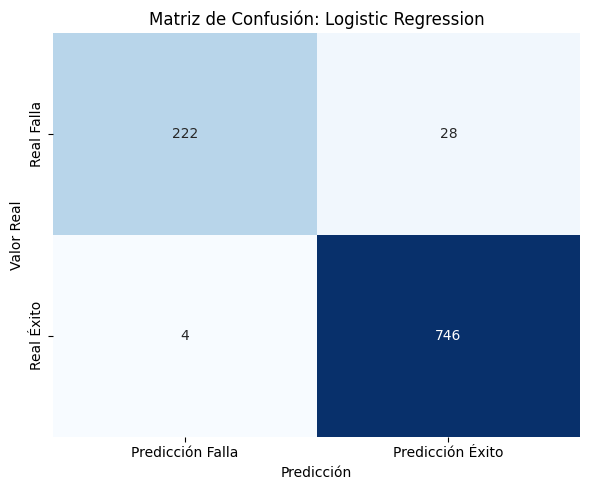

Gráfico 'confusion_matrix_Logistic_Regression.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Métricas para Logistic Regression):
**Matriz de Confusión para Logistic Regression:**
Esta tabla es clave para entender dónde acierta y dónde se equivoca el modelo.
  - Casilla Superior Izquierda (222): **Verdaderas Fallas (TN)**. Formulaciones que eran Fallas y el modelo predijo correctamente como Fallas. ¡Muy bien!
  - Casilla Inferior Derecha (746): **Verdaderos Éxitos (TP)**. Formulaciones que eran Éxitos y el modelo predijo correctamente como Éxitos. ¡Queremos muchos de estos!
  - Casilla Superior Derecha (28): **Falsos Éxitos (FP)**. Formulaciones que eran Fallas, pero el modelo predijo erróneamente como Éxitos. Esto nos llevaría a invertir en una fórmula que no funciona. (Cuidado con los recursos desperdiciados).
  - Casilla Inferior Izquierda (4): **Falsas Fallas (FN)**. Formulaciones que eran Éxitos, pero el modelo predijo er

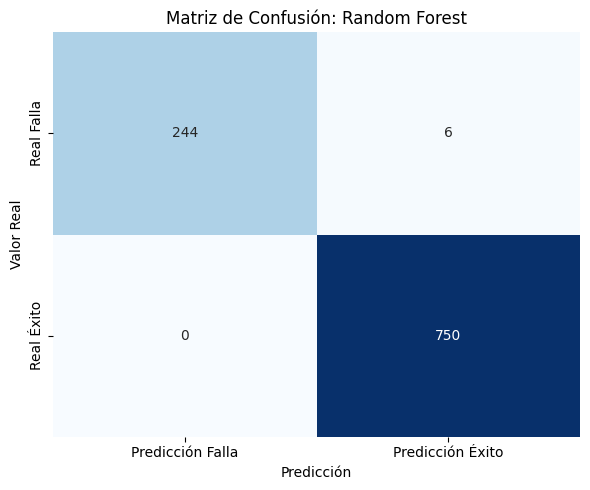

Gráfico 'confusion_matrix_Random_Forest.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Métricas para Random Forest):
**Matriz de Confusión para Random Forest:**
Esta tabla es clave para entender dónde acierta y dónde se equivoca el modelo.
  - Casilla Superior Izquierda (244): **Verdaderas Fallas (TN)**. Formulaciones que eran Fallas y el modelo predijo correctamente como Fallas. ¡Muy bien!
  - Casilla Inferior Derecha (750): **Verdaderos Éxitos (TP)**. Formulaciones que eran Éxitos y el modelo predijo correctamente como Éxitos. ¡Queremos muchos de estos!
  - Casilla Superior Derecha (6): **Falsos Éxitos (FP)**. Formulaciones que eran Fallas, pero el modelo predijo erróneamente como Éxitos. Esto nos llevaría a invertir en una fórmula que no funciona. (Cuidado con los recursos desperdiciados).
  - Casilla Inferior Izquierda (0): **Falsas Fallas (FN)**. Formulaciones que eran Éxitos, pero el modelo predijo erróneamente como Fal

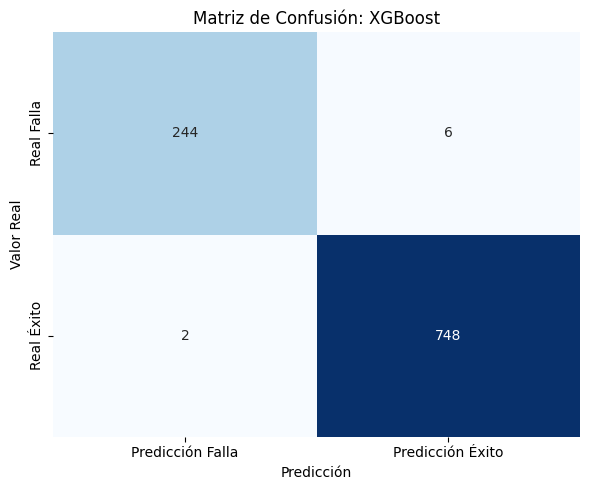

Gráfico 'confusion_matrix_XGBoost.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Métricas para XGBoost):
**Matriz de Confusión para XGBoost:**
Esta tabla es clave para entender dónde acierta y dónde se equivoca el modelo.
  - Casilla Superior Izquierda (244): **Verdaderas Fallas (TN)**. Formulaciones que eran Fallas y el modelo predijo correctamente como Fallas. ¡Muy bien!
  - Casilla Inferior Derecha (748): **Verdaderos Éxitos (TP)**. Formulaciones que eran Éxitos y el modelo predijo correctamente como Éxitos. ¡Queremos muchos de estos!
  - Casilla Superior Derecha (6): **Falsos Éxitos (FP)**. Formulaciones que eran Fallas, pero el modelo predijo erróneamente como Éxitos. Esto nos llevaría a invertir en una fórmula que no funciona. (Cuidado con los recursos desperdiciados).
  - Casilla Inferior Izquierda (2): **Falsas Fallas (FN)**. Formulaciones que eran Éxitos, pero el modelo predijo erróneamente como Fallas. Esto signific

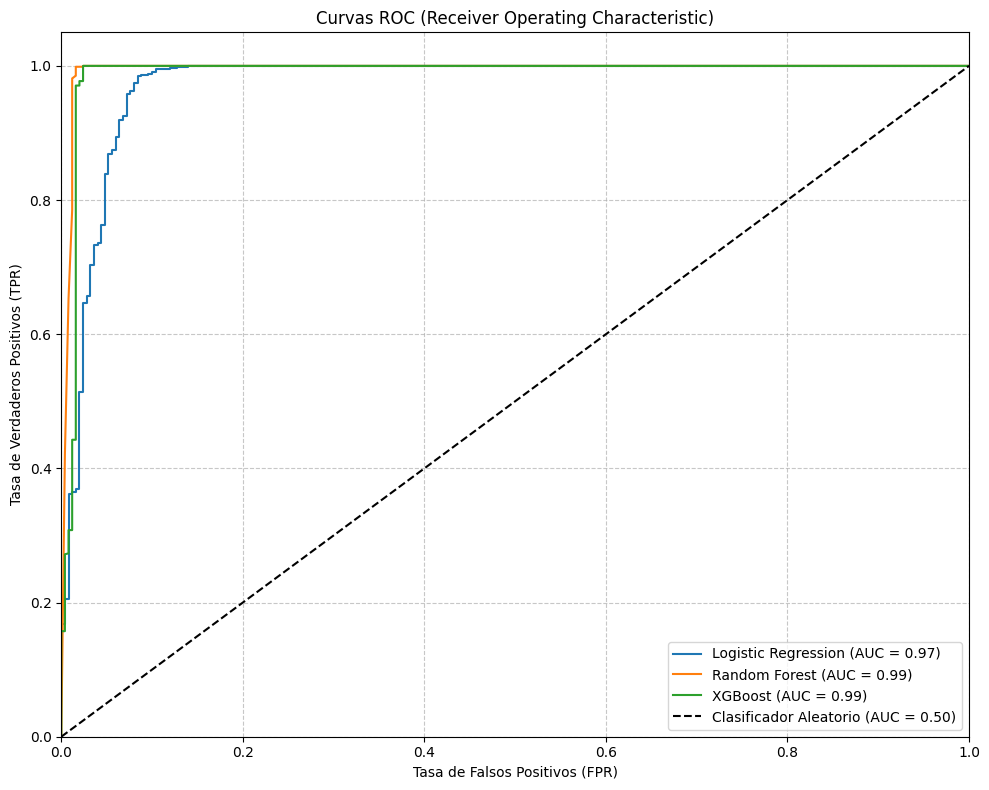

Gráfico 'roc_curves_comparison.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Curva ROC y AUC):
La Curva ROC y el Área Bajo la Curva (AUC) nos dan una visión de qué tan bien el modelo distingue entre 'Éxito' y 'Falla'.
  - Cuanto más se acerque la curva a la esquina superior izquierda (más 'hinchada' hacia arriba), mejor es el modelo.
  - El valor AUC (Area Under the Curve) va de 0.5 (modelo aleatorio) a 1.0 (modelo perfecto).
  - **Para Leonardo:** Un AUC alto (por encima de 0.80-0.90) significa que el modelo es muy bueno para diferenciar
    entre las formulaciones exitosas y las fallidas. Esto le da confianza en que las predicciones del modelo
    son significativas y no solo producto del azar.


In [3]:
# ------------------------------------------------------------------------------
# 3. Evaluación y Comparación de Modelos
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("3. EVALUACIÓN Y COMPARACIÓN DE MODELOS")
print("--------------------------------------------------")

# Imprimir reportes de clasificación y matrices de confusión para cada modelo
for name, res in results.items():
    print(f"\n===== Reporte de Clasificación para {name} =====")
    print(classification_report(y_test, model.predict(X_test))) # Regenerar para imprimir
    print("\nMatriz de Confusión:")
    print(res['confusion_matrix'])

    # Visualizar Matriz de Confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicción Falla', 'Predicción Éxito'],
                yticklabels=['Real Falla', 'Real Éxito'])
    plt.title(f'Matriz de Confusión: {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f'confusion_matrix_{name.replace(" ", "_")}.png'))
    plt.show()
    print(f"Gráfico 'confusion_matrix_{name.replace(' ', '_')}.png' guardado en {plots_dir}")

    print(f"\nExplicación para Leonardo (Métricas para {name}):")
    print(f"**Matriz de Confusión para {name}:**")
    print("Esta tabla es clave para entender dónde acierta y dónde se equivoca el modelo.")
    print(f"  - Casilla Superior Izquierda ({res['confusion_matrix'][0,0]}): **Verdaderas Fallas (TN)**. Formulaciones que eran Fallas y el modelo predijo correctamente como Fallas. ¡Muy bien!")
    print(f"  - Casilla Inferior Derecha ({res['confusion_matrix'][1,1]}): **Verdaderos Éxitos (TP)**. Formulaciones que eran Éxitos y el modelo predijo correctamente como Éxitos. ¡Queremos muchos de estos!")
    print(f"  - Casilla Superior Derecha ({res['confusion_matrix'][0,1]}): **Falsos Éxitos (FP)**. Formulaciones que eran Fallas, pero el modelo predijo erróneamente como Éxitos. Esto nos llevaría a invertir en una fórmula que no funciona. (Cuidado con los recursos desperdiciados).")
    print(f"  - Casilla Inferior Izquierda ({res['confusion_matrix'][1,0]}): **Falsas Fallas (FN)**. Formulaciones que eran Éxitos, pero el modelo predijo erróneamente como Fallas. Esto significa que perdemos una buena oportunidad. (Cuidado con las oportunidades perdidas).")

    print("\n**Reporte de Clasificación (Accuracy, Precision, Recall, F1-Score):**")
    print(f"  - **Accuracy ({res['accuracy']:.2f}):** La proporción total de predicciones correctas. Si bien es una medida general, en nuestro caso con el desbalance de clases, puede ser engañosa.")
    print(f"    *Para Leonardo:* Nos dice cuántas veces el modelo acertó en general. Pero si casi todo es 'Éxito', un modelo que siempre predice 'Éxito' podría tener alta 'Accuracy' sin ser útil.")
    print(f"  - **Precision ({res['precision']:.2f}):** Para la clase 'Éxito' (1). De las fórmulas que el modelo predijo como 'Éxito', ¿cuántas lo fueron realmente?")
    print(f"    *Para Leonardo:* Una 'Precision' alta significa que cuando el modelo le dice '¡Éxito!', usted puede confiar en que lo más probable es que sí lo sea. Esto minimiza el riesgo de que invierta recursos en formulaciones que el modelo predijo exitosas pero que al final fallan (¡menos desperdicio!).")
    print(f"  - **Recall ({res['recall']:.2f}):** Para la clase 'Éxito' (1). De todas las fórmulas que *eran* realmente 'Éxito', ¿cuántas fue capaz de identificar el modelo?")
    print(f"    *Para Leonardo:* Un 'Recall' alto significa que el modelo es muy bueno encontrando todas las formulaciones exitosas disponibles. Esto minimiza el riesgo de que pase por alto una fórmula potencialmente exitosa porque el modelo la predijo como falla (¡menos oportunidades perdidas!).")
    print(f"  - **F1-Score ({res['f1_score']:.2f}):** Un equilibrio entre Precision y Recall. Es útil cuando ambos son importantes.")
    print(f"    *Para Leonardo:* Este valor le da una idea general del buen balance entre no generar falsos positivos y no perder verdaderos positivos. Es una métrica robusta para el desbalance que tenemos.")
    print("-------------------------------------------------------------------")


# Visualizar Curvas ROC para todos los modelos en un solo gráfico
print("\nGenerando Curvas ROC y AUC para comparación de modelos...")
plt.figure(figsize=(10, 8))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'roc_curves_comparison.png'))
plt.show()
print(f"Gráfico 'roc_curves_comparison.png' guardado en {plots_dir}")

print("\nExplicación para Leonardo (Curva ROC y AUC):")
print("La Curva ROC y el Área Bajo la Curva (AUC) nos dan una visión de qué tan bien el modelo distingue entre 'Éxito' y 'Falla'.")
print("  - Cuanto más se acerque la curva a la esquina superior izquierda (más 'hinchada' hacia arriba), mejor es el modelo.")
print("  - El valor AUC (Area Under the Curve) va de 0.5 (modelo aleatorio) a 1.0 (modelo perfecto).")
print("  - **Para Leonardo:** Un AUC alto (por encima de 0.80-0.90) significa que el modelo es muy bueno para diferenciar")
print("    entre las formulaciones exitosas y las fallidas. Esto le da confianza en que las predicciones del modelo")
print("    son significativas y no solo producto del azar.")



--------------------------------------------------
4. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
--------------------------------------------------


C:\Users\Víctor\AppData\Local\Temp\ipykernel_5016\282759401.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:n_features]], y=np.array(feature_names)[indices[:n_features]], palette='viridis')


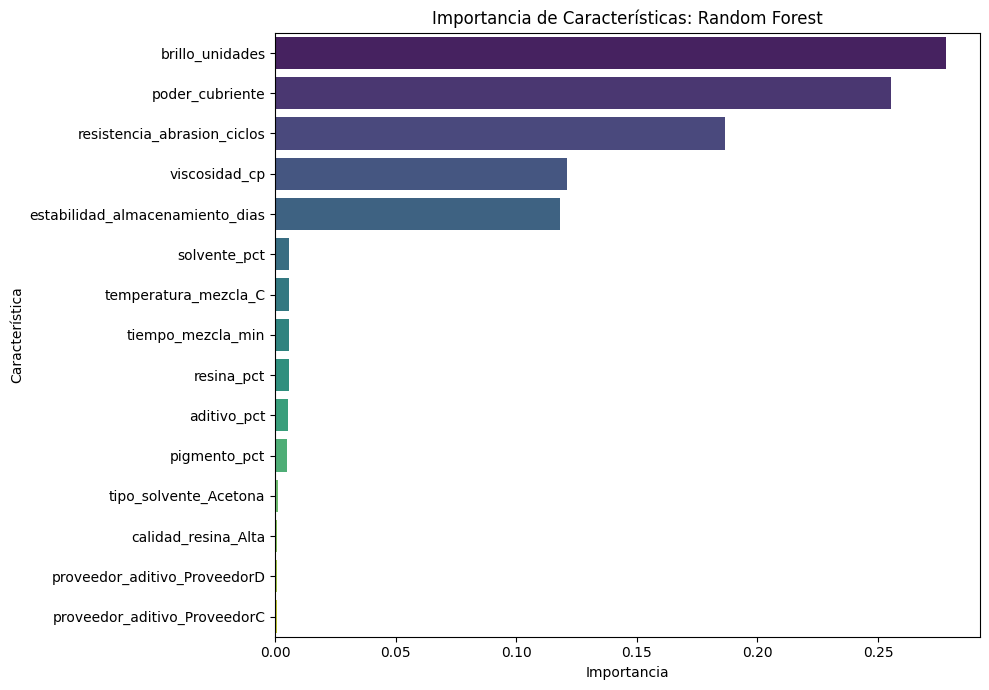

Gráfico 'feature_importance_Random_Forest.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Importancia de Características para Random Forest):
Este gráfico le muestra cuáles son las características (ingredientes, proporciones, condiciones de proceso)
que el modelo considera más influyentes para predecir el éxito o la falla de una formulación.
  - Las barras más largas indican una mayor importancia. Esto es de **gran valor para su equipo de I+D**.
  - Le ayuda a confirmar sus intuiciones y a dirigir futuros experimentos: ¿Hay algún ingrediente o factor de proceso
    que no esperábamos que fuera tan importante? ¿Los factores que consideramos clave realmente lo son para el modelo?
Utilice esta información para enfocar sus esfuerzos de mejora y optimización.


C:\Users\Víctor\AppData\Local\Temp\ipykernel_5016\282759401.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:n_features]], y=np.array(feature_names)[indices[:n_features]], palette='viridis')


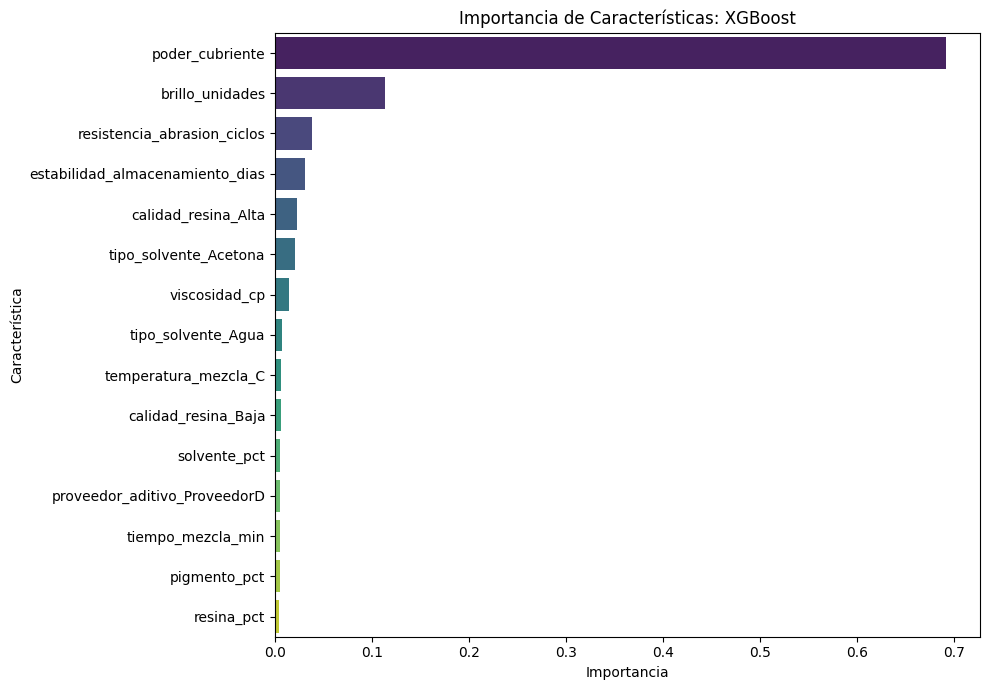

Gráfico 'feature_importance_XGBoost.png' guardado en C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\plots

Explicación para Leonardo (Importancia de Características para XGBoost):
Este gráfico le muestra cuáles son las características (ingredientes, proporciones, condiciones de proceso)
que el modelo considera más influyentes para predecir el éxito o la falla de una formulación.
  - Las barras más largas indican una mayor importancia. Esto es de **gran valor para su equipo de I+D**.
  - Le ayuda a confirmar sus intuiciones y a dirigir futuros experimentos: ¿Hay algún ingrediente o factor de proceso
    que no esperábamos que fuera tan importante? ¿Los factores que consideramos clave realmente lo son para el modelo?
Utilice esta información para enfocar sus esfuerzos de mejora y optimización.


In [4]:
# ------------------------------------------------------------------------------
# 4. Análisis de Importancia de Características (para Random Forest/XGBoost)
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("4. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("--------------------------------------------------")

# Obtener los nombres de las características post-procesamiento
feature_names = X_train.columns.tolist()

# Función para visualizar la importancia de las características
def plot_feature_importance(model, feature_names, model_name, n_features=15):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1] # Ordenar de mayor a menor

        plt.figure(figsize=(10, 7))
        plt.title(f"Importancia de Características: {model_name}")
        sns.barplot(x=importances[indices[:n_features]], y=np.array(feature_names)[indices[:n_features]], palette='viridis')
        plt.xlabel("Importancia")
        plt.ylabel("Característica")
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f'feature_importance_{model_name.replace(" ", "_")}.png'))
        plt.show()
        print(f"Gráfico 'feature_importance_{model_name.replace(' ', '_')}.png' guardado en {plots_dir}")

        print(f"\nExplicación para Leonardo (Importancia de Características para {model_name}):")
        print("Este gráfico le muestra cuáles son las características (ingredientes, proporciones, condiciones de proceso)")
        print("que el modelo considera más influyentes para predecir el éxito o la falla de una formulación.")
        print("  - Las barras más largas indican una mayor importancia. Esto es de **gran valor para su equipo de I+D**.")
        print("  - Le ayuda a confirmar sus intuiciones y a dirigir futuros experimentos: ¿Hay algún ingrediente o factor de proceso")
        print("    que no esperábamos que fuera tan importante? ¿Los factores que consideramos clave realmente lo son para el modelo?")
        print("Utilice esta información para enfocar sus esfuerzos de mejora y optimización.")
    else:
        print(f"El modelo {model_name} no tiene el atributo 'feature_importances_'.")


plot_feature_importance(models['Random Forest'], feature_names, 'Random Forest')
plot_feature_importance(models['XGBoost'], feature_names, 'XGBoost')


In [5]:
# ------------------------------------------------------------------------------
# 5. Guardar Modelos Entrenados (Para uso futuro en predicciones)
# ------------------------------------------------------------------------------

print("\n--------------------------------------------------")
print("5. GUARDADO DE MODELOS ENTRENADOS")
print("--------------------------------------------------")

# Se recomienda guardar los modelos entrenados para poder cargarlos
# directamente en la fase de 'app.py' para hacer predicciones sin re-entrenar.
models_dir = os.path.join(os.getcwd(), '..', 'models') # Nueva carpeta 'models'
os.makedirs(models_dir, exist_ok=True)

for name, model in models.items():
    model_save_path = os.path.join(models_dir, f'{name.replace(" ", "_").lower()}_model.joblib')
    joblib.dump(model, model_save_path)
    print(f"Modelo '{name}' guardado en: {model_save_path}")

print("\nFase de Modelado y Evaluación Completada.")
print("Hemos entrenado varios modelos y evaluado su rendimiento.")
print("Los gráficos y explicaciones le ayudarán a entender qué tan bien funcionan y por qué.")
print("--------------------------------------------------")


--------------------------------------------------
5. GUARDADO DE MODELOS ENTRENADOS
--------------------------------------------------
Modelo 'Logistic Regression' guardado en: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\models\logistic_regression_model.joblib
Modelo 'Random Forest' guardado en: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\models\random_forest_model.joblib
Modelo 'XGBoost' guardado en: C:\Users\Víctor\Documents\PaintFormulatorAI\notebooks\..\models\xgboost_model.joblib

Fase de Modelado y Evaluación Completada.
Hemos entrenado varios modelos y evaluado su rendimiento.
Los gráficos y explicaciones le ayudarán a entender qué tan bien funcionan y por qué.
--------------------------------------------------
